In [1]:
library('tidyverse')
library('ggplot2')
library('ggrepel')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘ggrepel’ was built under R version 4.2.2”


In [2]:
World_Cup = read_csv('https://raw.githubusercontent.com/hjohns15/WC-Stats-2022/main/12-5-22',
                    col_types = cols())
World_Cup |> head()

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


Squad,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Glsper,Astper,⋯,xG,npxG,xAG,npxG+xAG,xGper,xAGper,xG+xAGper,npxGper,npxG+xAGper,Eliminated
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Argentina,7,5,6,1,2,2,0,1.75,1.25,⋯,7.6,6.2,4.3,10.5,1.90,1.07,2.97,1.55,2.62,NA
Australia,3,3,3,0,0,7,0,0.75,0.75,⋯,2.3,2.3,1.9,4.2,0.58,0.48,1.06,0.58,1.06,NA
Belgium,1,1,1,0,0,5,0,0.33,0.33,⋯,4.7,4.7,3.8,8.5,1.57,1.27,2.85,1.57,2.85,Y
Brazil,7,5,6,1,1,3,0,1.75,1.25,⋯,9.4,8.7,6.5,15.2,2.36,1.63,3.99,2.17,3.79,NA
Cameroon,4,4,4,0,0,8,1,1.33,1.33,⋯,3.4,3.4,2.0,5.4,1.14,0.66,1.80,1.14,1.80,Y
Canada,1,1,1,0,1,8,0,0.33,0.33,⋯,4.2,3.6,2.8,6.4,1.41,0.95,2.35,1.18,2.13,Y


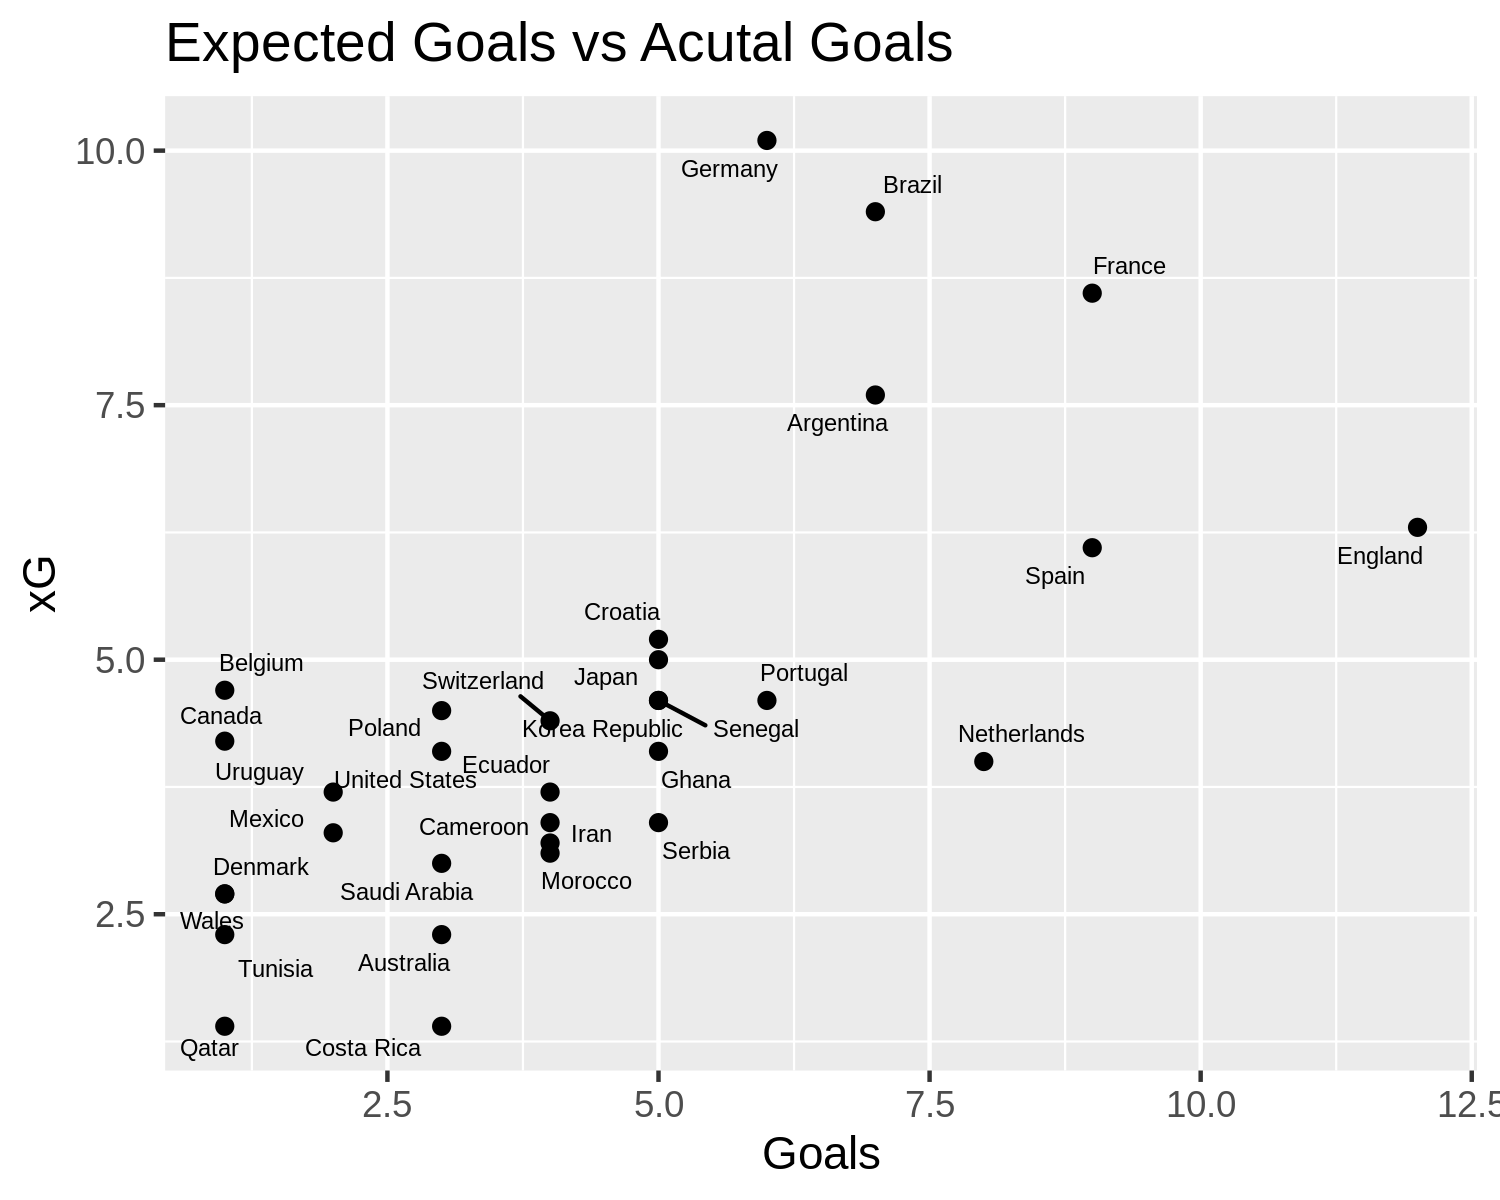

In [14]:
p = ggplot(World_Cup, aes(x = Gls, y = xG)) +
    geom_point() + 
    geom_text_repel(aes(label = Squad), size = 2) +
    ggtitle("Expected Goals vs Acutal Goals") +
    xlab("Goals")

p

The chart above displays the expected number of goals versus the actual number of goals scored at the 2022 World Cup. The data for this and the following charts are provided using data from opta and fbref.com. Expected Goals (xG) is a metric designed to measure the probability of a shot resulting in a goal. xG indicates which teams create better chances. In this chart countries like Argentina, Germany, Brazil and France create high quaility chances. Countries like the Netherlands, Spain, and England create less high quality chances but have had better fortune scoring goals.

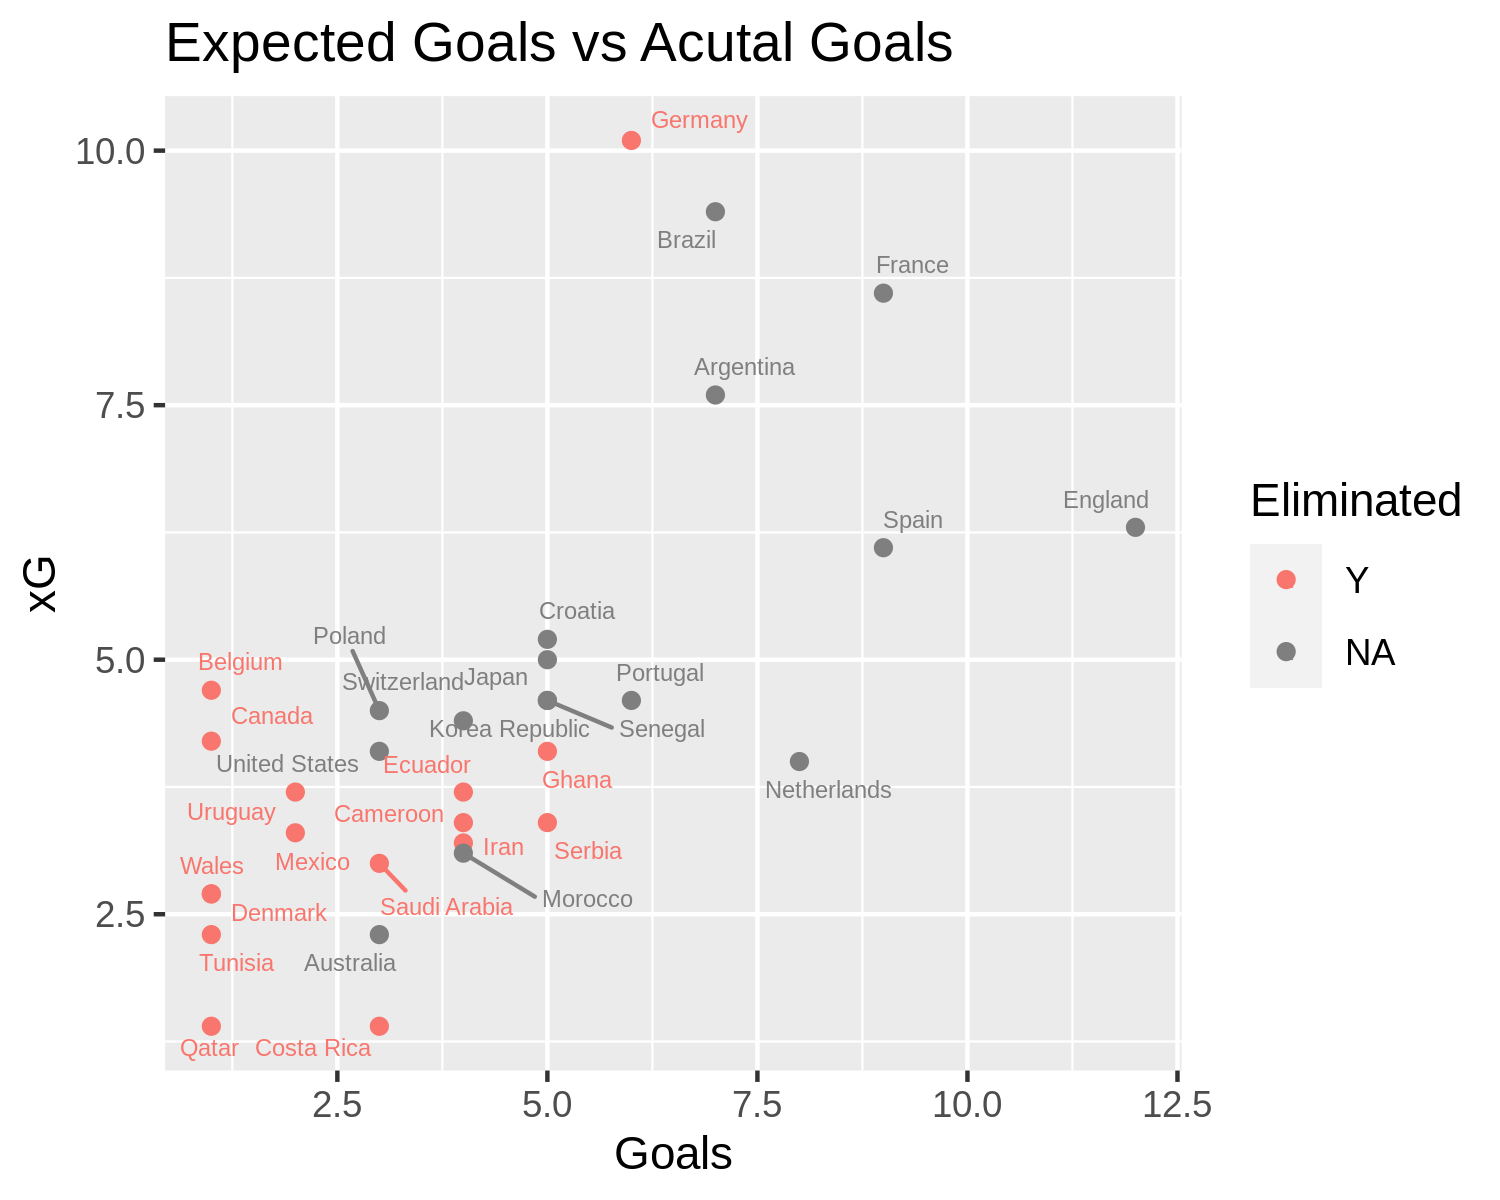

In [13]:
p = ggplot(World_Cup, aes(x = Gls, y = xG, color = Eliminated)) +
    geom_point() + 
    geom_text_repel(aes(label = Squad), size = 2) +
    ggtitle("Expected Goals vs Acutal Goals") +
    xlab("Goals")

p

This chart demonstrates that while the teams that create the higher xG more often go through to the next stage there are a number of outliers. Germany for example created the highest xG of any team in the World Cup but were knocked out in the group stages. While countries like Austrailia and Morocco that created some of the highest goal scoring chances moved on to the round of 16. 

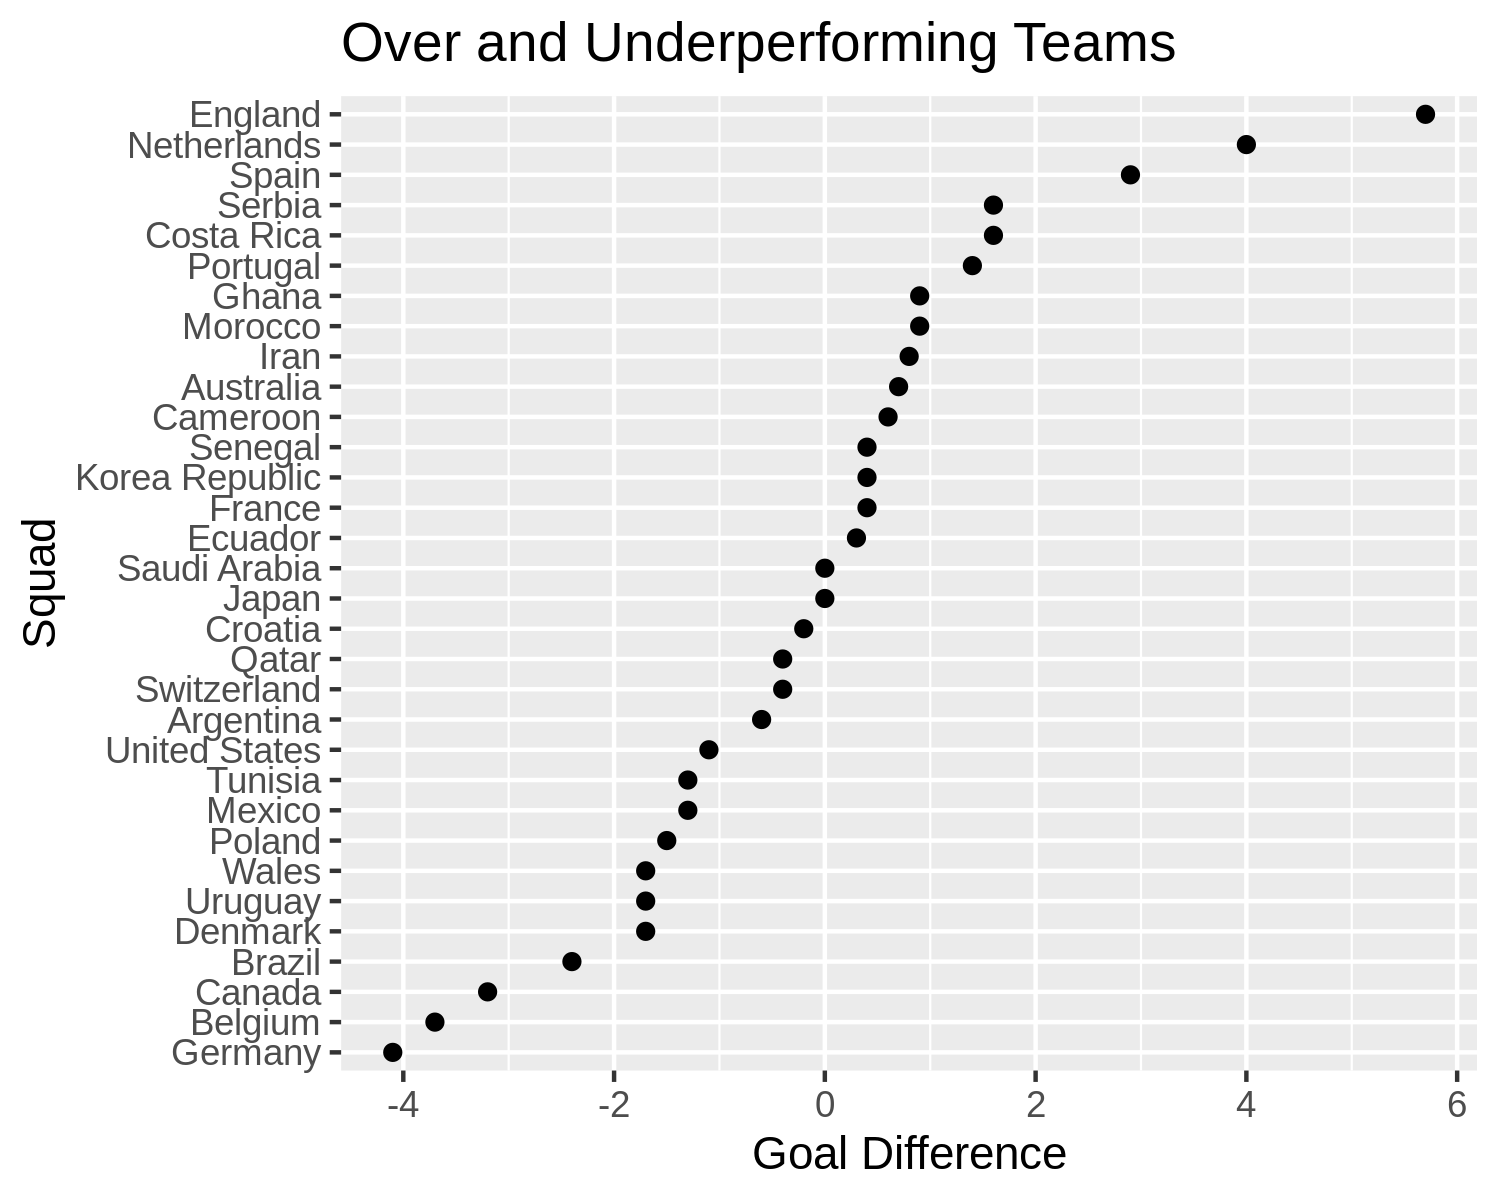

In [12]:
World_Cup_Goals = World_Cup |>
    mutate(Goal_Diff = Gls - xG)

p = ggplot(World_Cup_Goals, aes(x = Goal_Diff, y = reorder(Squad, Goal_Diff))) + 
    geom_point() +
    ggtitle("Over and Underperforming Teams") +
    ylab("Squad") +
    xlab("Goal Difference")
p

This final chart is the goal difference, the number of actual goals scored minus the expected number of goals. The goal difference demonstrates which teams are under performing and over performing when it comes to scoring goals. The bottom three countries of Canada, Belgium and Germany all were unable to finish the chances they created and eventually were knocked out in the group stages. On the other end counries England, Netherlands, and Spain scored way more goals from lesser opportunities and all of these teams made it past the knockout round.